# Detection Base models

In [76]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def plot_bounding_box(image_path, detections):
    # Define a colormap with a large number of colors
    num_classes = len(set(detections.class_id))
    cmap = plt.cm.get_cmap('hsv', num_classes + 1)  # Adding 1 to include background color
    colors = cmap(np.linspace(0, 1, num_classes + 1))  # Adding 1 to include background color

    # Read the image
    image = cv2.imread(image_path)

    # Iterate over each detection
    for i, detection in enumerate(detections.xyxy):
        # Extract detection information
        x1, y1, x2, y2 = map(int, detection)
        class_id = detections.class_id[i]

        # Draw bounding box rectangle with unique color for each class
        color = colors[class_id % num_classes]  # Ensure looping over colors
        color = tuple(int(255 * x) for x in color)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)


    # Show the image with bounding boxes
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


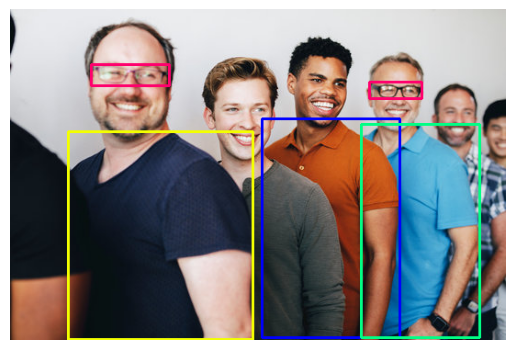

In [77]:
from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology
base_model = GroundingDINO(    ontology=CaptionOntology(
        {
           'Orange shirt': 'shirt',
              'Blue shirt': 'shirt',
                'Black shirt': 'shirt',
                'eye glasses': 'glasses',
        }
    )
)
result = base_model.predict("test 2.jpg")
plot_bounding_box('test 2.jpg', result)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


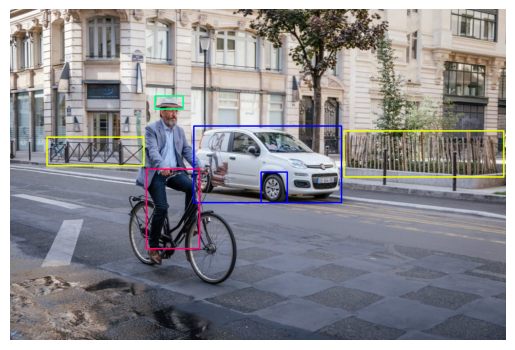

In [78]:
base_model = GroundingDINO(    ontology=CaptionOntology(
        {
          'front wheel of a car': 'wheel',
          'hat':'hat',
          'fencing':'fence',
          'dark blue jeans':'jeans',
          
        }
    )
)
result = base_model.predict("test.jpg")
plot_bounding_box('test.jpg', result)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


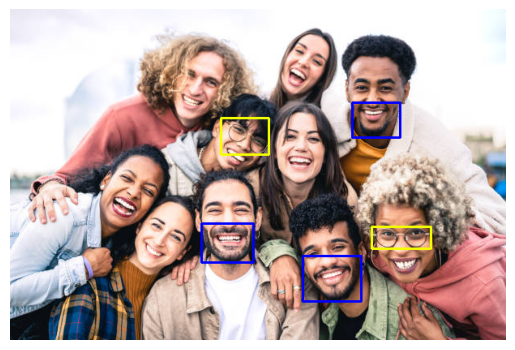

In [79]:
base_model = GroundingDINO(    ontology=CaptionOntology(
        {
            'beard': 'beard',
            'eye glasses': 'glasses',
        }
    )
)
result = base_model.predict("test 3.jpg")
plot_bounding_box('test 3.jpg', result.with_nms())

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


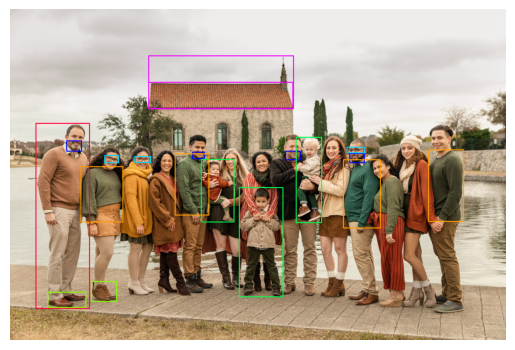

In [91]:
base_model = GroundingDINO(    ontology=CaptionOntology(
        {
            'beard': 'beard',
            'eye glasses': 'glasses',
            'baby': 'baby',
            'dark brown men shoes': 'shoes',
            'green shirt': 'shirt',
            'Tallest person with brown shirt': 'person',
            'roof': 'roof',
        }
    )
)
result = base_model.predict("test 4.jpg")
plot_bounding_box('test 4.jpg', result.with_nms())